Датасет 1. Целевой признак Exited:
1 - клиент закрыл счет в банке,
0 - клиент остается.
Задача определить продолжает ли человек оставаться клиентом банка или нет.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy

Загрузка данных.

In [2]:
DATA_PATH = os.path.join(os.getcwd(), 'datasets', 'Churn_Modelling.csv')
def load_data(data_path=DATA_PATH):
    return pd.read_csv(data_path)

In [3]:
data = load_data()
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Столбцы RowNumber, CustomerId и Surname не влияют на то, закрыл ли клиент счет в банке или нет, поэтому удаляем эти столбцы.

In [4]:
data.drop(['CustomerId', 'Surname', 'RowNumber'], axis=1, inplace=True)

In [5]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Датасет содержит 2 категориальных признака Geography и Gender.

Просмотрим имена всех признаков.

In [6]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

Просмотрим характеристики датасета.

In [7]:
data.describe(include='all')

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


Количество записей в каждом из столбцов одинаковое и равняется 10000. Для всех признаков, кроме Geography и Gender, отстутствуют значения unique, top и freq.

Проверим наличие пропусков в данных.

In [8]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Датасет не имеет пропущенных данных.

Посмотрим на распределение данных.

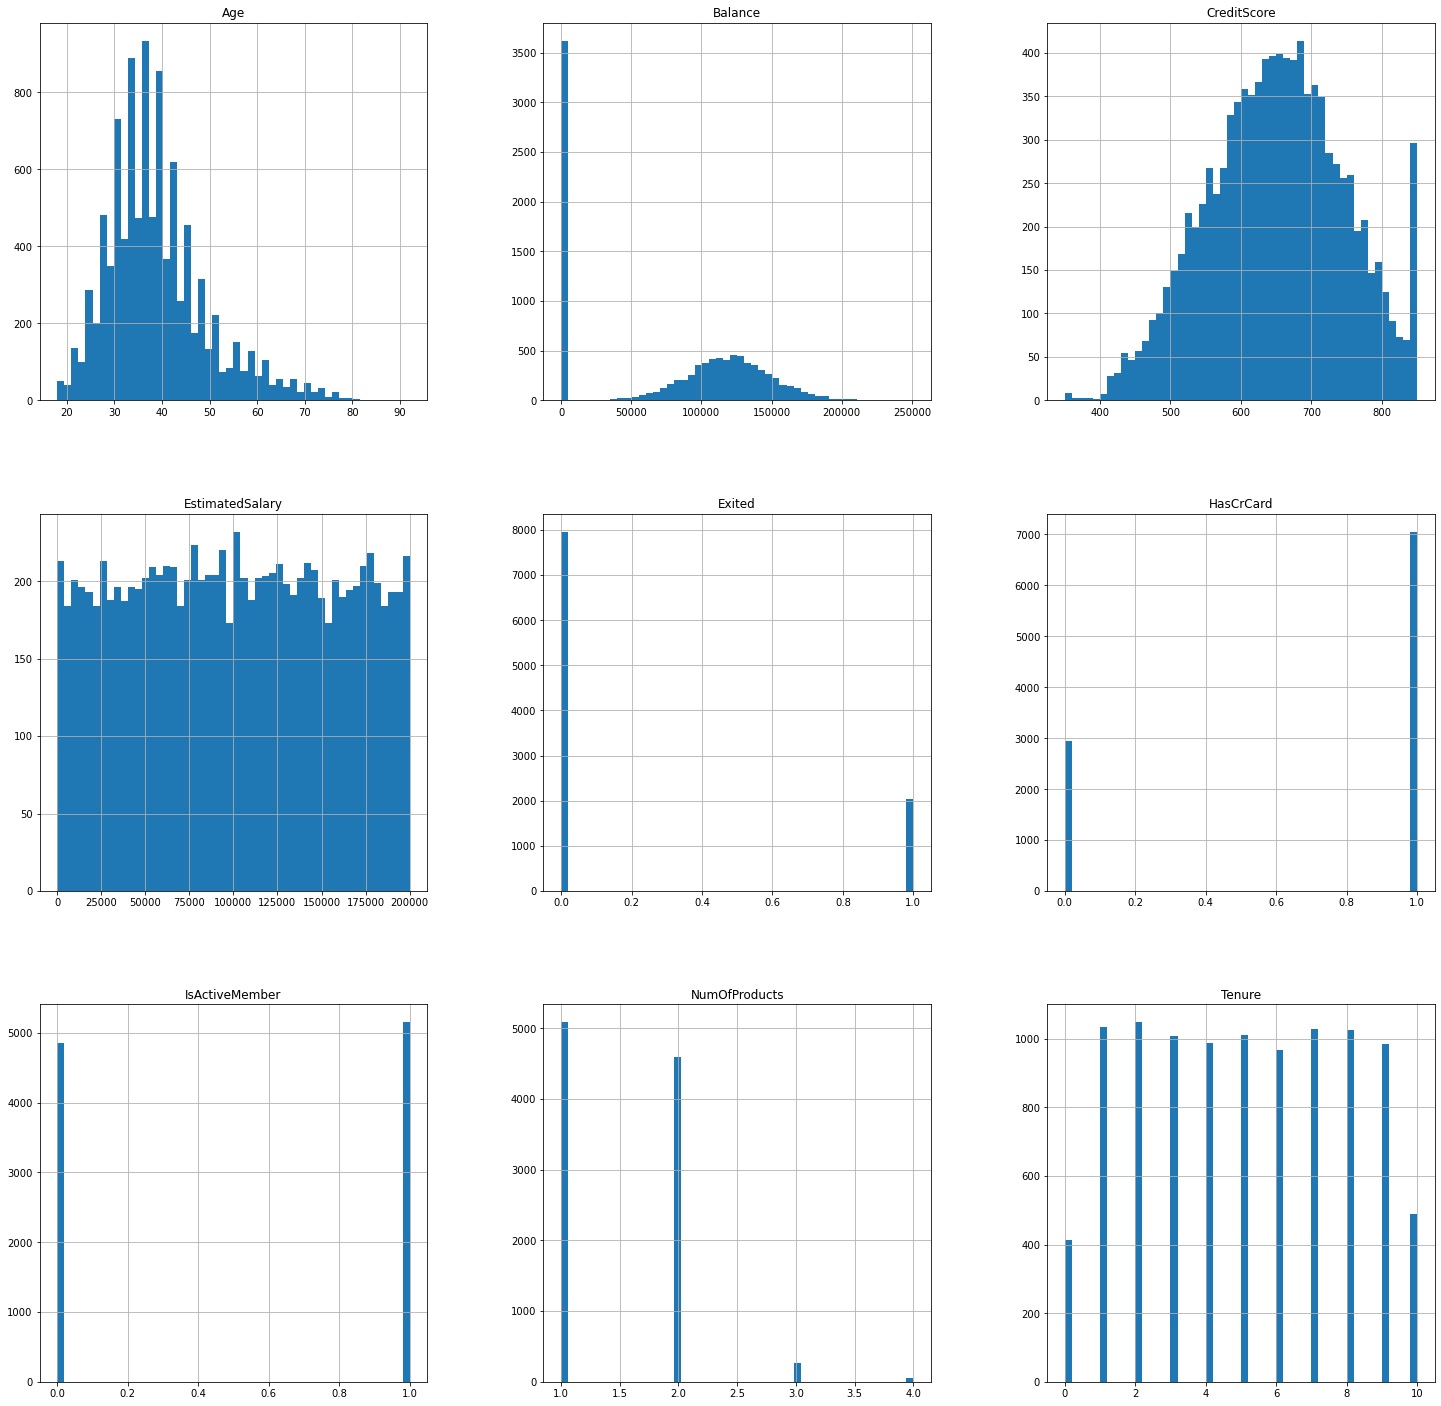

In [9]:
%matplotlib inline
data.hist(bins=50, figsize=(25,25))
plt.show()

In [10]:
scipy.stats.norm.interval(0.50, data['CreditScore'].mean(), data['CreditScore'].std())

(585.3371406798402, 715.7204593201599)

In [11]:
scipy.stats.norm.interval(0.50, data['Age'].mean(), data['Age'].std())

(31.8478820462849, 45.99571795371509)

50% всех клиентов имеют кредитный рейтинг от 585 до 715 и возраст от 31 до 45 лет. Большинство клиентов имеют кредитные карты и приобретают 1 или 2 продукта. Число активных и неактивных клиентов примерно одинаково.

Составим корреляционную матрицу.

In [12]:
corr_matrix = data.corr()
corr_matrix['Exited'].sort_values(ascending=False)

Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
HasCrCard         -0.007138
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64

Наибольшую по модулю корреляцию имеют признаки Age, IsActiveMember и Balance.

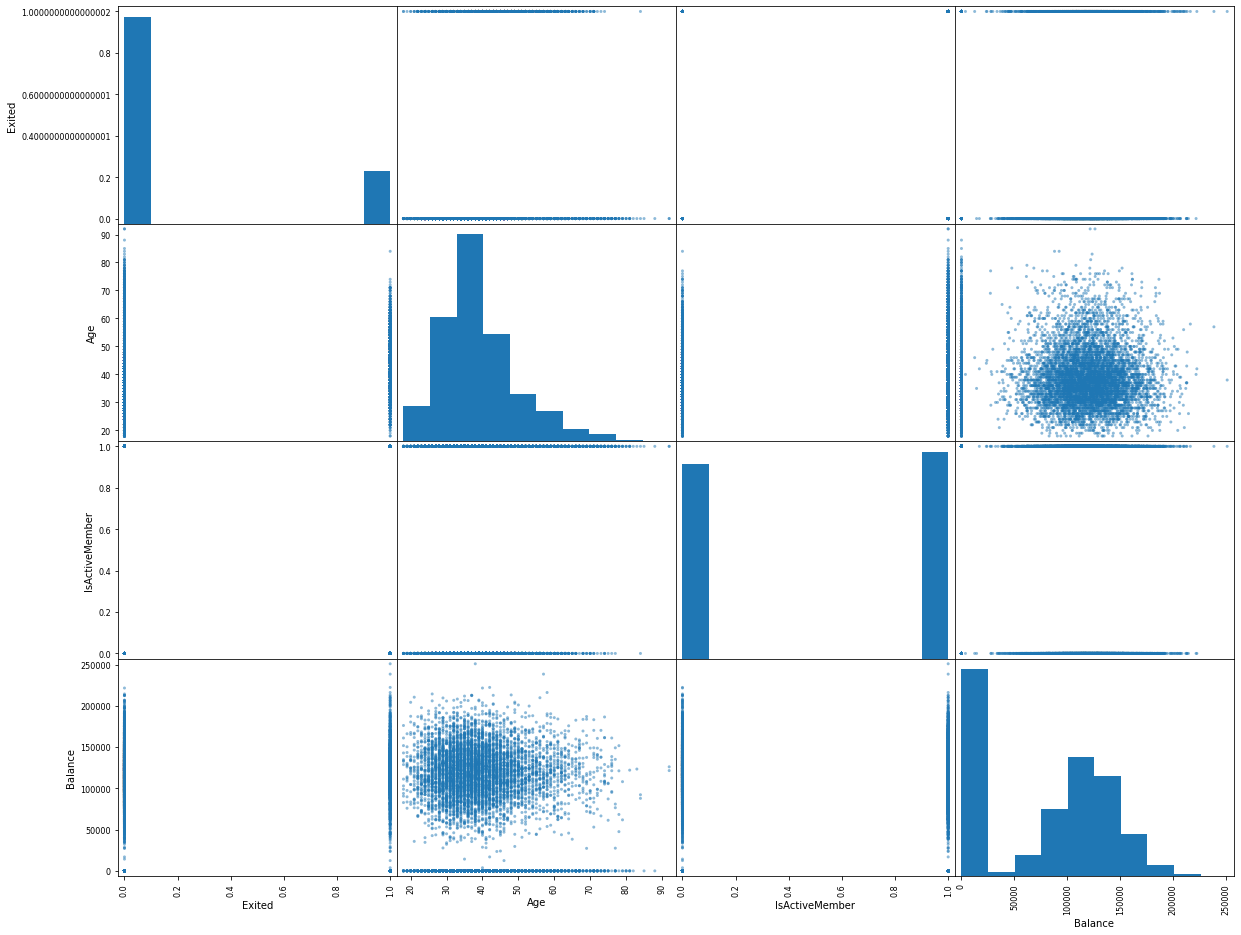

In [13]:
from pandas.plotting import scatter_matrix
attributes = ['Exited', 'Age', 'IsActiveMember', 'Balance']
scatter_matrix(data[attributes], figsize=(20, 16));

Проанализируем некоторые признаки.

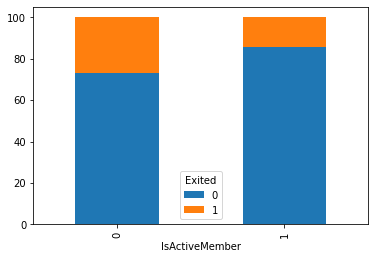

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [14]:
gr = (data.groupby('IsActiveMember')['Exited'].value_counts(normalize=True).unstack())*100
gr.plot(kind='bar', stacked='True')
plt.show()

data['IsActiveMember'].value_counts()

Видно, что активные клиенты менее склонны к уходу.

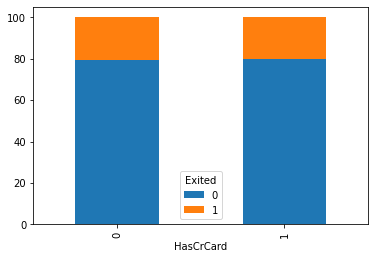

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [15]:
gr = (data.groupby('HasCrCard')['Exited'].value_counts(normalize=True).unstack())*100
gr.plot(kind='bar', stacked='True')
plt.show()

data['HasCrCard'].value_counts()

Наличие или отсутствие кредитной карты не сильно влияет на вероятность ухода.

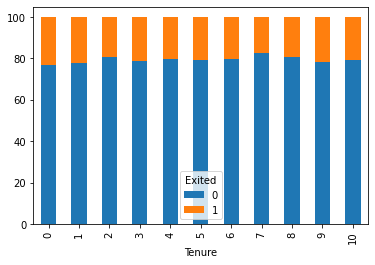

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

In [16]:
gr = (data.groupby('Tenure')['Exited'].value_counts(normalize=True).unstack())*100
gr.plot(kind='bar', stacked='True')
plt.show()

data['Tenure'].value_counts()

Как видим, на вероятность ухода не слишком сильно влияет число лет, в течение которых клиент является клиентом банка.

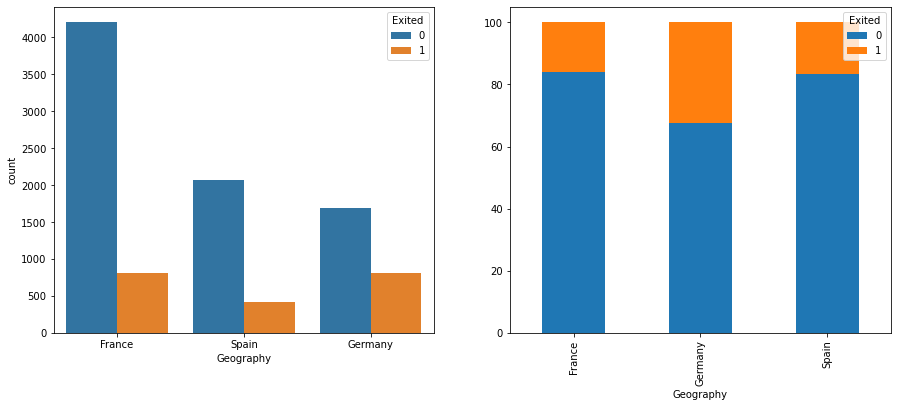

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(15,6))
sns.countplot(data['Geography'], hue=data['Exited'], ax=axes[0])
gr = (data.groupby('Geography')['Exited'].value_counts(normalize=True).unstack())*100
gr.plot(kind='bar', stacked='True', ax=axes[1])
plt.show()

data['Geography'].value_counts()

Большинство клиентов из Франции. Из правого графика можно заметить, что среди клиентов из Германии процент закрывших счет больше, чем в других странах. Процент клиентов закрывших счет в Испании и Франции примерно одинаковый. 

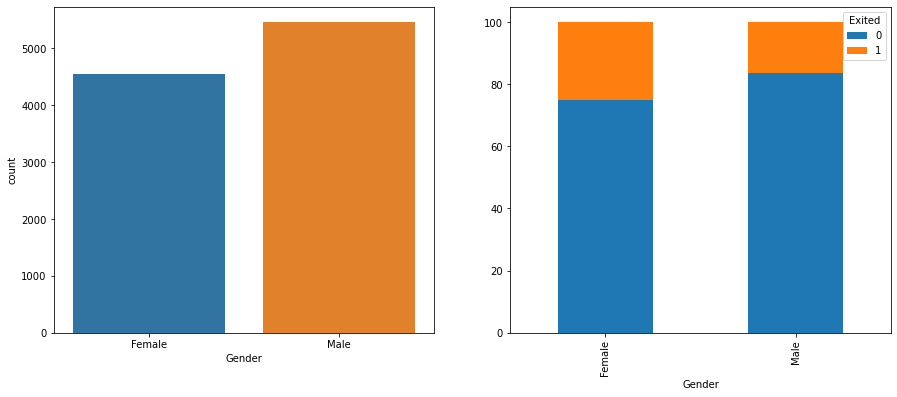

Male      5457
Female    4543
Name: Gender, dtype: int64

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(15,6))
sns.countplot(data['Gender'], ax=axes[0])
gr = (data.groupby('Gender')['Exited'].value_counts(normalize=True).unstack())*100
gr.plot(kind='bar', stacked='True', ax=axes[1])
plt.show()

data['Gender'].value_counts()

Большинство клиентов являются мужчинами. Правый график показывает, что уровень оттока среди женщин выше, чем среди мужчин.

Заменим категориальные признаки на числовые.

In [19]:
data = pd.get_dummies(data, columns=['Geography'], prefix='From', prefix_sep='', dtype=np.int64)
data['Gender'] = data['Gender'].map({'Male' : 1, 'Female' : 0})

In [20]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,FromFrance,FromGermany,FromSpain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


Снова составим корреляционную матрицу.

In [21]:
corr_matrix = data.corr()
corr_matrix['Exited'].sort_values(ascending=False)

Exited             1.000000
Age                0.285323
FromGermany        0.173488
Balance            0.118533
EstimatedSalary    0.012097
HasCrCard         -0.007138
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
FromSpain         -0.052667
FromFrance        -0.104955
Gender            -0.106512
IsActiveMember    -0.156128
Name: Exited, dtype: float64

К признакам с высокой корреляцией добавились FromGermany, FromFrance и Gender.

Составим новый признак: отношение числа лет, в течение которых клиент пользуется услугами банка к возрасту клиента.

In [22]:
data['TenurePerAge'] = data['Tenure'] / data['Age']

In [23]:
corr_matrix = data.corr()
corr_matrix['Exited'].sort_values(ascending=False)

Exited             1.000000
Age                0.285323
FromGermany        0.173488
Balance            0.118533
EstimatedSalary    0.012097
HasCrCard         -0.007138
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
FromSpain         -0.052667
FromFrance        -0.104955
Gender            -0.106512
TenurePerAge      -0.121641
IsActiveMember    -0.156128
Name: Exited, dtype: float64

Как видно, новый признак имеет достаточно большой по модулю коэффициент корреляции.

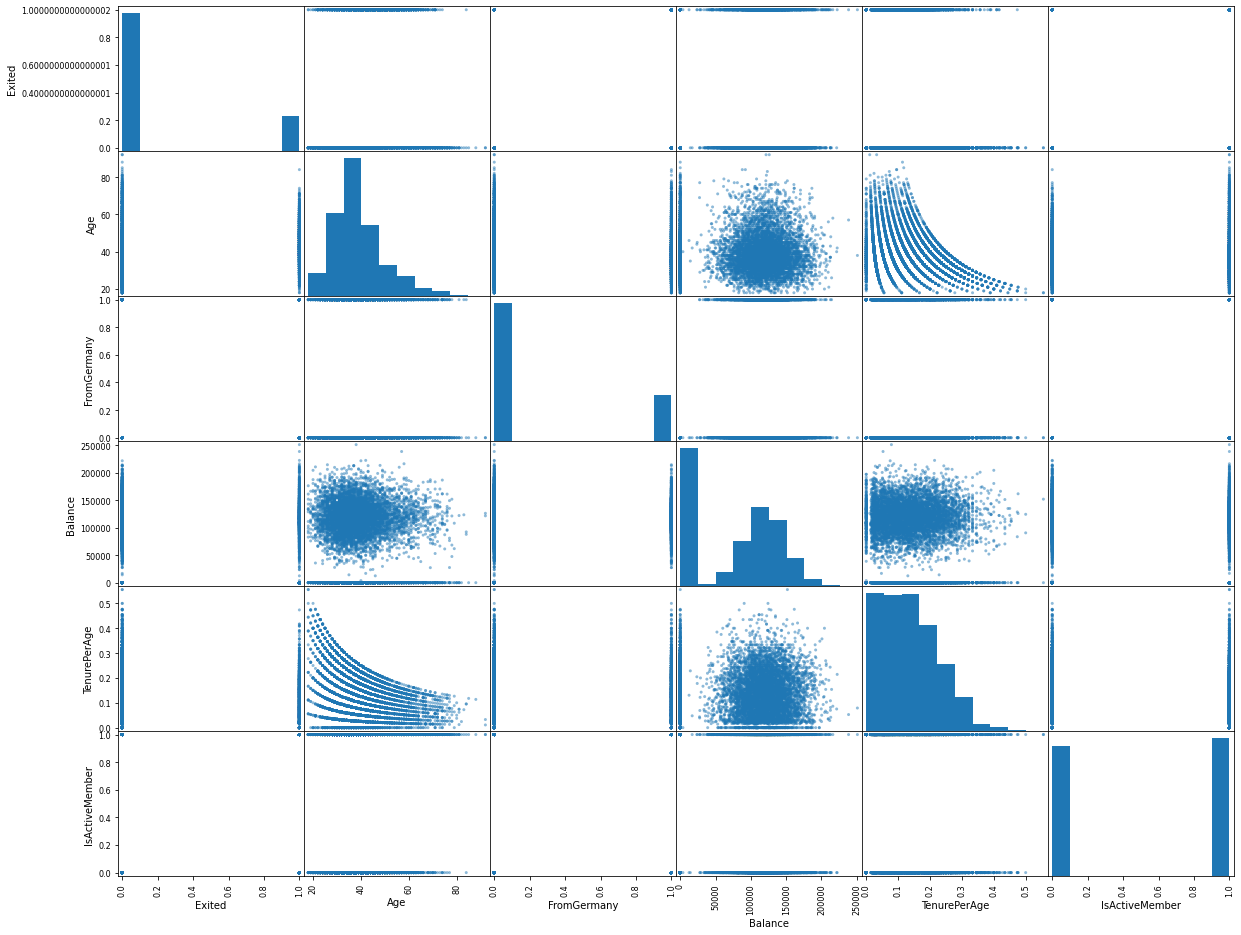

In [24]:
from pandas.plotting import scatter_matrix
attributes = ['Exited', 'Age' ,'FromGermany', 'Balance', 'TenurePerAge', 'IsActiveMember']
scatter_matrix(data[attributes], figsize=(20, 16));

Для решения поставленной задачи стоит взять признаки Age, FromGermany, IsActiveMember, TenurePerAge и Balance, так как они оказывают наибольшее влияние на тот факт, останется ли клиент или нет.